# TP1 - Exploration et transformation des données


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import time

## Étape 1 : On considère le fichier train_users_2.csv
* Indiquer les points marquants l'exploration.
* Pour chaque observation, indiquer l’opération à effectuer qui serait la plus appropriée.

In [4]:
df = pd.read_csv('train_users_2.csv', index_col=0)

In [5]:
print('\nAffichange du dataset\n')
display(df.head(10))  # Affiche les 10 premières lignes


Affichange du dataset



,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


### Quels sont les descripteurs (colonnes) du dataset?

In [7]:
print("Les descripteurs du dataset")
print(df.columns.tolist())

Les descripteurs du dataset
['date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']


### Combien d'enregistrements (lignes) ont été fournis ?

In [9]:
nombre_enregistrements = df.shape[0]
print("le nombre d'enregistrements:",nombre_enregistrements)

le nombre d'enregistrements: 213451


### Quel est le format des données. Par exemple, dans quel format les dates sont fournies, existe-t-il des valeurs numériques, à quoi ressemblent les différentes valeurs catégorielles ?

In [11]:
print(df.info())  # Vérifie les types de données et les valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
Index: 213451 entries, gxn3p5htnn to nw9fwlyb5f
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     213451 non-null  object 
 1   timestamp_first_active   213451 non-null  int64  
 2   date_first_booking       88908 non-null   object 
 3   gender                   213451 non-null  object 
 4   age                      125461 non-null  float64
 5   signup_method            213451 non-null  object 
 6   signup_flow              213451 non-null  int64  
 7   language                 213451 non-null  object 
 8   affiliate_channel        213451 non-null  object 
 9   affiliate_provider       213451 non-null  object 
 10  first_affiliate_tracked  207386 non-null  object 
 11  signup_app               213451 non-null  object 
 12  first_device_type        213451 non-null  object 
 13  first_browser            213451 non-null  object 
 

<span> Les données de types date: 'date_account_created', 'timestamp_first_active', 'date_first_booking'</span></br>
<span> Les données de types numériques: 'age', 'signup_flow'</span></br>
<span> Les données de types categorielles: 'gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'</span>

### Y a-t-il des valeurs manquantes?

In [14]:
print("Valeurs manquantes par colonne:\n")
print(df.isnull().sum())  # Compte les valeurs manquantes par colonne

Valeurs manquantes par colonne:

date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64


### Est-ce qu’il y’a des dépendances évidentes au niveau des descripteurs?

#### Corrélations entre variables qualitatives

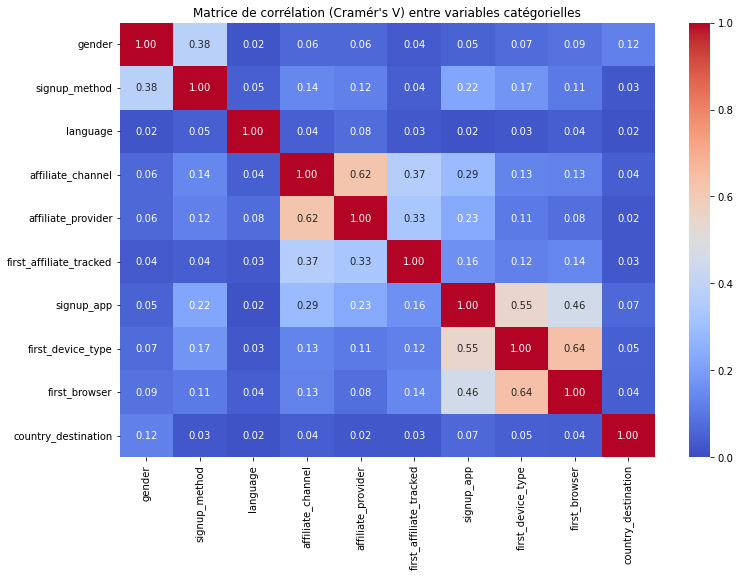

In [17]:
# Sélectionner les colonnes catégorielles
categorical_columns = [
    'gender', 'signup_method', 'language', 'affiliate_channel',
    'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
    'first_device_type', 'first_browser', 'country_destination'
]

# Fonction pour calculer le coefficient de Cramér
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Créer une matrice de corrélation
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Remplir la matrice avec les coefficients de Cramér
for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convertir la matrice en valeurs numériques
correlation_matrix = correlation_matrix.astype(float)

# Afficher la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title("Matrice de corrélation (Cramér's V) entre variables catégorielles")
plt.show()

#### Corrélations entre variables numériques

Nombre de cas où `timestamp_first_active` est postérieur à `date_account_created` : 213273


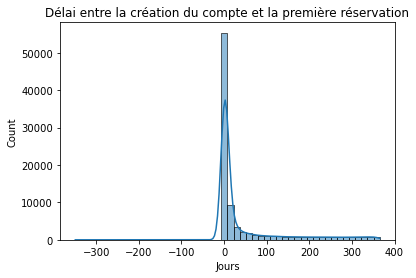

Dataset avec dates converties:



,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,timestamp_issue,booking_delay
id,,,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,False,NaN
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,False,NaN
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,False,-57.0
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,False,278.0
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,False,-208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,2014-06-30 23:56:36,NaT,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,True,NaN
mhewnxesx9,2014-06-30,2014-06-30 23:57:19,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,True,NaN
6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,NaT,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,True,NaN


In [19]:
# Vérifier les dépendances temporelles
# Vérifier que les timestamps sont bien ordonnés
df["date_account_created"] = pd.to_datetime(df["date_account_created"]) #Convesion de la colonne "date_account_created" en datet

# Conversion de la colonne 'date_account_created' en datetime si ce n'est pas déjà fait
df["timestamp_first_active"] = pd.to_datetime(df["timestamp_first_active"], format='%Y%m%d%H%M%S')
df["date_first_booking"] = pd.to_datetime(df["date_first_booking"])

# Vérifier si `timestamp_first_active` est toujours avant ou égal à `date_account_created`
df["timestamp_issue"] = df["timestamp_first_active"] > df["date_account_created"]
print("Nombre de cas où `timestamp_first_active` est postérieur à `date_account_created` :", df["timestamp_issue"].sum())

# Visualiser l'écart entre `date_account_created` et `date_first_booking`
df["booking_delay"] = (df["date_first_booking"] - df["date_account_created"]).dt.days
sns.histplot(df["booking_delay"].dropna(), bins=50, kde=True)
plt.title("Délai entre la création du compte et la première réservation")
plt.xlabel("Jours")
plt.show()

print('Dataset avec dates converties:\n')
display(df)
#Interprétation :
#Si timestamp_first_active est après date_account_created, il y a un problème dans les données.
#La distribution des délais de réservation permet de voir combien de temps les utilisateurs attendent avant leur première réservation.

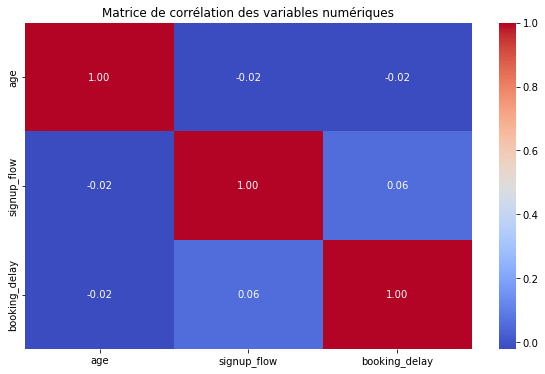

In [20]:
df_numeric = df.select_dtypes(include=[np.number])

correlation_numeriques = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_numeriques, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

id
820tgsjxq7    38.0
4ft3gnwmtx    56.0
bjjt8pjhuk    42.0
87mebub9p4    41.0
lsw9q7uk0j    46.0
              ... 
omlc9iku7t    34.0
0k26r3mir0    36.0
qbxza0xojf    23.0
zxodksqpep    32.0
6o3arsjbb4    32.0
Name: age, Length: 122932, dtype: float64

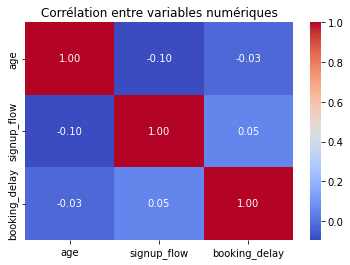

In [21]:

# Convertir l'âge en numérique et traiter les valeurs aberrantes
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df_FilteredAge = df[(df["age"] > 17) & (df["age"] < 100)]  # Filtrer des âges aberrants
display(df_FilteredAge['age'])

# Matrice de corrélation
num_vars = ["age", "signup_flow", "booking_delay"]
corr_matrix = df_FilteredAge[num_vars].corr()

# Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre variables numériques")
plt.show()

#Interprétation :
#Vérifiez si l'âge influence le temps avant la première réservation.
#Si une forte corrélation existe, l'âge pourrait être une variable clé pour prédire la destination.

### D’autres observations sur le dataset qui pourraient être pertinentes ?

In [23]:
print(df.describe())

                 age    signup_flow  booking_delay
count  125461.000000  213451.000000   88908.000000
mean       49.668335       3.267387      44.362498
std       155.666612       7.637707      87.499561
min         1.000000       0.000000    -349.000000
25%        28.000000       0.000000       1.000000
50%        34.000000       0.000000       3.000000
75%        43.000000       0.000000      29.000000
max      2014.000000      25.000000     365.000000


#### Boxplot de l'âge en fonction du pays de destination

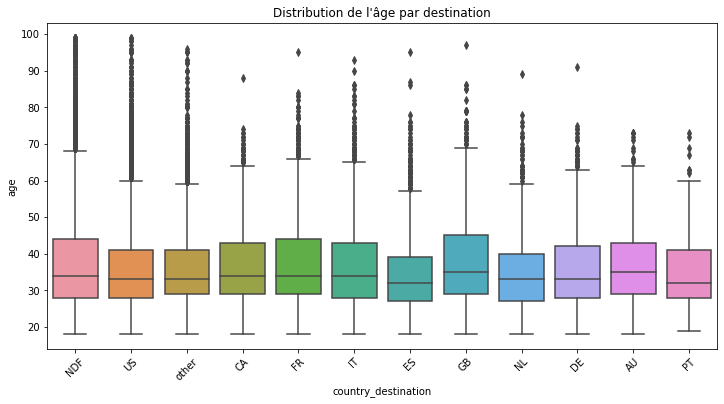

In [25]:
#L'âge semble être la seule variable continue intéressante pour un boxplot.
plt.figure(figsize=(12, 6))
sns.boxplot(x="country_destination", y="age", data=df_FilteredAge)
plt.xticks(rotation=45)
plt.title("Distribution de l'âge par destination")
plt.show()

#### Boxplot de l'âge selon le sexe :

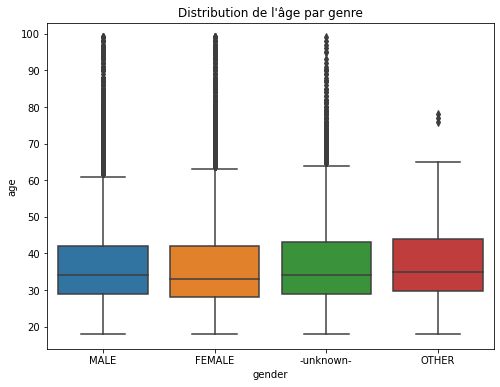

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="gender", y="age", data=df_FilteredAge)
plt.title("Distribution de l'âge par genre")
plt.show()

#### Boxplot de l'âge selon le canal d'affiliation :

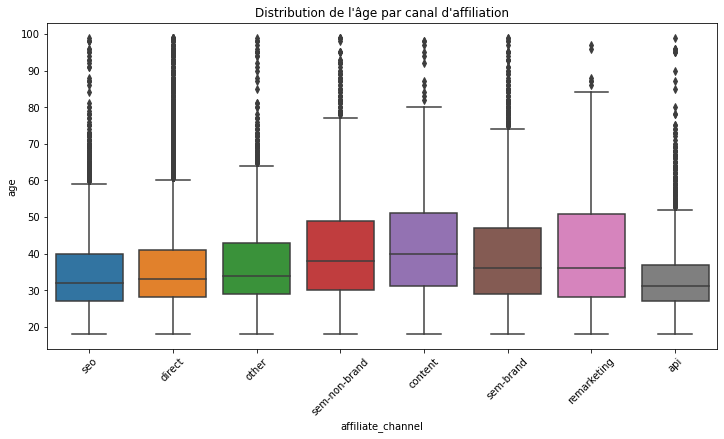

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="affiliate_channel", y="age", data=df_FilteredAge)
plt.xticks(rotation=45)
plt.title("Distribution de l'âge par canal d'affiliation")
plt.show()

#### Détection des valeurs aberrantes de l'âge (outliers)

In [31]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]
display(outliers[['age']])  # Liste des outliers

,age
id,
dgatsm5ocq,69.0
3qsa4lo7eg,5.0
47wdhtdini,72.0
uhbkw5exeg,70.0
kw7qyvlhsq,70.0
...,...
pw9nfo1ulb,95.0
y37l7vzjpa,66.0
jl5f10hu4t,69.0


#### Relations entre variables catégorielles

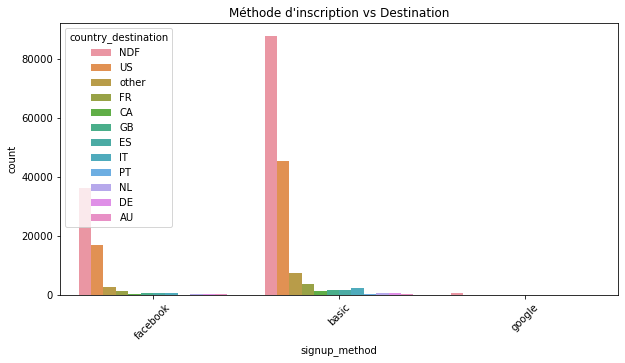

In [33]:
#Impact de signup_method sur country_destination
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="signup_method", hue="country_destination")
plt.title("Méthode d'inscription vs Destination")
plt.xticks(rotation=45)
plt.show()

#Interprétation :
#Certains modes d'inscription sont peut-être plus populaires pour certaines destinations.
#Par exemple, les utilisateurs inscrits via Google ou Facebook peuvent être différents de ceux inscrits par email.

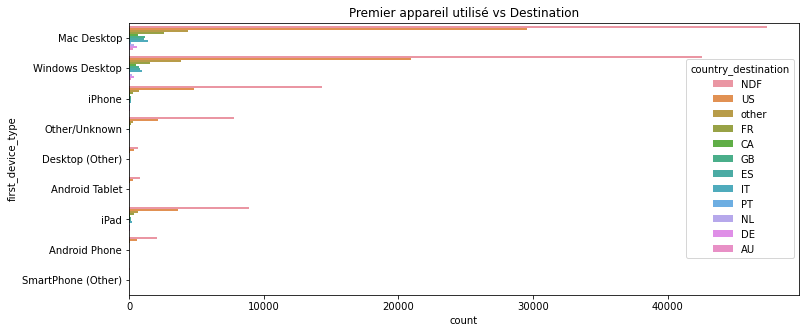

In [34]:
#Influence de first_device_type sur country_destination
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="first_device_type", hue="country_destination")
plt.title("Premier appareil utilisé vs Destination")
plt.show()

#Interprétation :
#Les utilisateurs mobiles (iPhone, Android) réservent-ils plus rapidement que ceux sur ordinateur ?

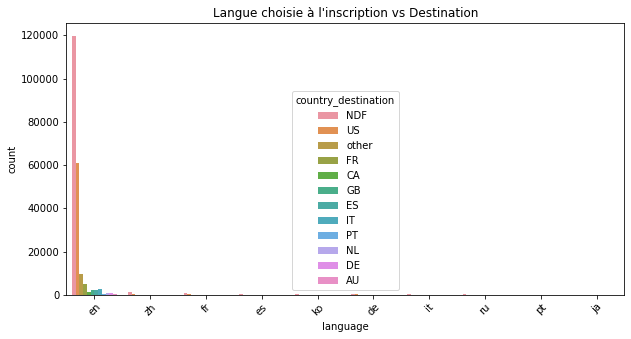

In [35]:
#Langue (language) et destination
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="language", hue="country_destination", order=df["language"].value_counts().index[:10])
plt.title("Langue choisie à l'inscription vs Destination")
plt.xticks(rotation=45)
plt.show()

#Interprétation :
#La langue d'inscription influence-t-elle la destination finale ?
#Ex : Les utilisateurs en français réservent-ils plus souvent en France ?

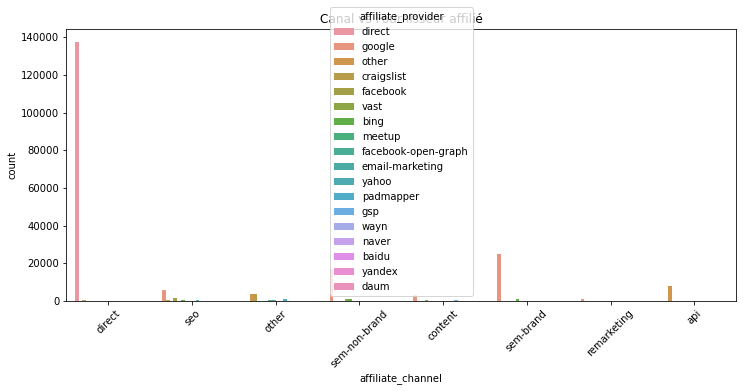

In [36]:
# Vérifier les relations entre affiliés
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="affiliate_channel", hue="affiliate_provider")
plt.title("Canal vs Fournisseur affilié")
plt.xticks(rotation=45)
plt.show()

#Interprétation :
#Certains fournisseurs affiliés sont spécialisés dans certains canaux de conversion.

In [37]:
#Résumé des dépendances explorées :
#Dépendances temporelles (timestamp_first_active, date_account_created, date_first_booking)
#✔ Corrélations entre variables numériques (âge, délai de réservation)
#✔ Influence des méthodes d'inscription, des appareils et de la langue sur la destination
#✔ Relation entre les affiliés et leur impact sur les inscriptions

## Étape 2 : On considère le fichier train_users_2.csv et test_users.csv
* Implémenter les correctifs soulignés dans l’étape 1.

### Feature Engineering sur les dates

In [40]:
df['year_created'] = df['date_account_created'].dt.year
df['month_created'] = df['date_account_created'].dt.month
df['day_created'] = df['date_account_created'].dt.day

df['year_booking'] = df['date_first_booking'].dt.year
df['month_booking'] = df['date_first_booking'].dt.month

# Supprimer les colonnes originales si elles ne sont plus utiles
df.drop(['date_account_created', 'date_first_booking'], axis=1, inplace=True)

### Encodage des variables catégorielles
* Les modèles ML ne peuvent pas traiter les variables texte, donc on les encode avec One-Hot Encoding.

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_features = ['gender', 'signup_method', 'language', 'affiliate_channel',
                        'affiliate_provider', 'first_affiliate_tracked',
                        'signup_app', 'first_device_type', 'first_browser']

# One-Hot Encoding des variables catégorielles
encoder = OneHotEncoder(handle_unknown="ignore")

df_encoded = pd.get_dummies(df, columns=categorical_features)

### Standardisation des variables numériques
* On applique la Standardisation (StandardScaler) pour que toutes les variables aient une échelle similaire.

In [44]:
numerical_features = ['age', 'year_created', 'month_created', 'day_created', 'year_booking', 'month_booking']

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

### Utiliser un modèle prédictif pour estimer l'âge
* Évite d'aplatir la distribution des âges.
* Peut capturer des relations sous-jacentes.
* Méthode plus réaliste, surtout si l'âge a un impact sur la destination

In [46]:
from sklearn.impute import KNNImputer
import time
# Début du traitement
start_time = time.time()

# KNN marche mais time consuming, envisager RandomForest
# Sélection des colonnes pertinentes
features = ['age', 'signup_flow', 'year_created', 'month_created']
knn_imputer = KNNImputer(n_neighbors=5)
df[features] = knn_imputer.fit_transform(df[features])

# Fin du traitement
end_time = time.time()
# Calcul du temps écoulé
execution_time = end_time - start_time
print(f"Temps d'exécution: {execution_time:.6f} secondes")

# Vérifier les résultats
print(df[['age']].head())

print("Valeurs manquantes par colonne:\n")
print(df.isnull().sum())  # Compte les valeurs manquantes par colonne

ImportError: cannot import name 'METRIC_MAPPING64' from 'sklearn.metrics._dist_metrics' (/Users/follyayeboua/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_dist_metrics.cpython-39-darwin.so)